# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)  #пусть будут видны все столбцы при выводе на экран
pd.options.mode.chained_assignment = None

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv(r'D:\Yandex\Модуль 1 Python\Исследовательский анализ данных\real_estate_data.csv', sep='\t')

data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

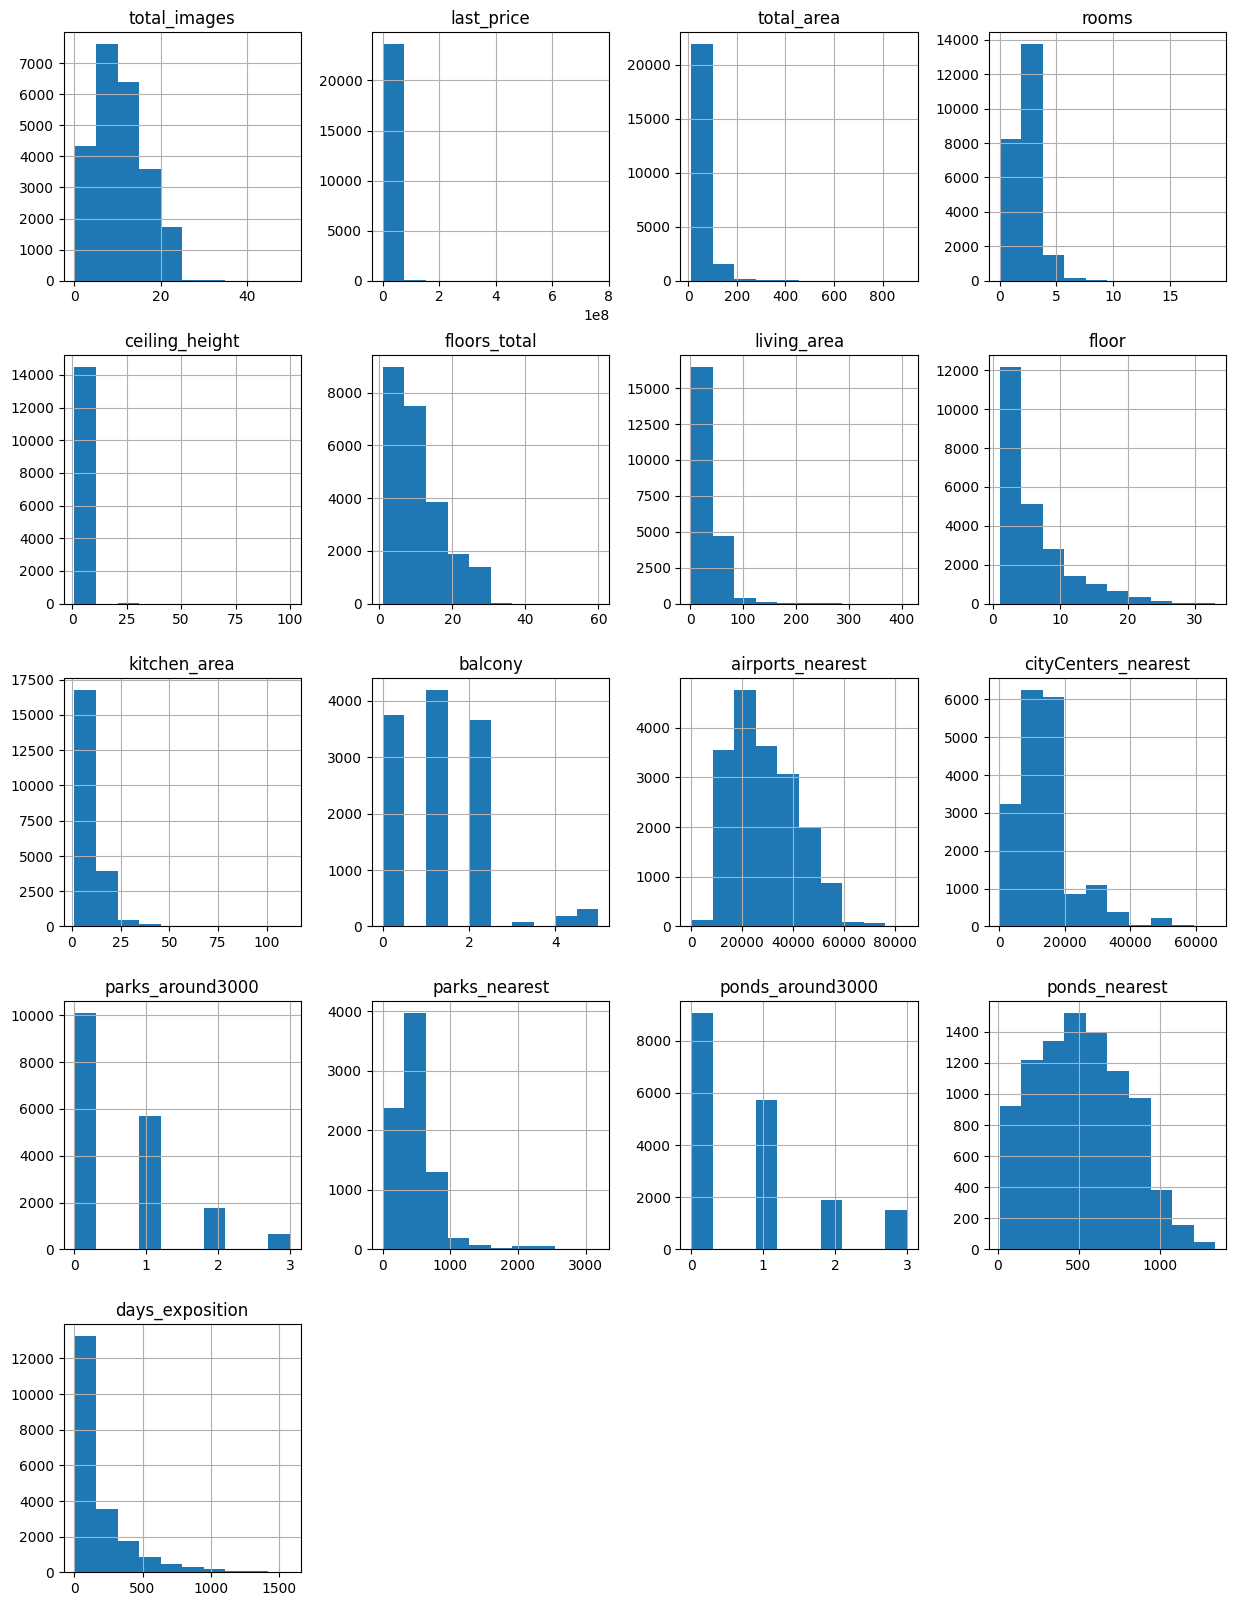

In [8]:
display(data.hist(figsize=(15, 20)))

Изучив данные, было замечено большое количество пропусков в данных. Необходимо выяснить природу этих пропусков и либо заменить пропуски, либо удалить.  
Заодно нужно поменять типы данных, например на datetime в first_day_exposition, а в некоторых столбцах достаточно целого числа int, а не float.  
Также необходимо узнать, что за выбросы были обнаружены на гистограммах. Как минимум, значения rooms, ceiling_height вызывают подозрения.
Далее нужно проверить данные на наличие дубликатов (явных и неявных).

### Предобработка данных

In [9]:
display(data.isna().sum())  #посмотрим кол-во пропусков в каждом столбце

#Сначала разберемся с наиболее очевидными пропусками

#если в объявлении не указана высота потолков, то можно использовать медиану по всем значеням
#print(data['ceiling_height'].median())  - 2.65 м. медианная высота потолков
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

#если в объявлении не указано является ли апартаментами квартира, то скорее всего не является
data['is_apartment'] = data['is_apartment'].fillna(False)  

#если в объявлении не указано кол-во балконов, то скорее всего в квартире их нет
data['balcony'] = data['balcony'].fillna(0) 

#если в объявлении не указан населенный пункт, то самостоятельно определить мы его не сможем
data['locality_name'] = data['locality_name'].fillna('unknown') 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
# удаление пропусков

data = data[~data['floors_total'].isna()]
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name               0
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Это были достаточно простые пропуски. Эти данные заполнялись пользователями, и скорее всего были проигнорированы в описании квартиры.  
Для высоты потолков взяли медианное значение по всем квартирам. Т.к. в данных присутствовали выбросы, среднее значение брать не стоило, однако кол-во этих выбросов было несущественно, так что медиана идеально подходит в данном случае.
Для кол-ва этажей в доме было принято решение удалить пропуски, т.к. кол-во пропусков было незначительно, а самостоятельно определить эти данные мы не можем.

In [11]:
#так как данные по общей площади квартир не пропущены, то:
#заменим пропуски в жилой площади, найдя среднее отношение по всем квартирам жилой площади к общей
#далее это отношение нужно умножить на известную нам общую площадь квартиры
data_living_area = data.query('living_area.isna()')
data_living_area['living_area'] = data_living_area['total_area'] * (data['living_area'] / data['total_area']).mean()
data['living_area'] = data['living_area'].fillna(round(data_living_area['living_area'], 2))

#по аналогии сделаем для кухонной площади
data_kitchen_area = data.query('kitchen_area.isna()')
data_kitchen_area['kitchen_area'] = data_kitchen_area['total_area'] * (data['kitchen_area'] / data['total_area']).mean()
data['kitchen_area'] = data['kitchen_area'].fillna(round(data_kitchen_area['kitchen_area'], 2))

Поскольку данные заполняются вручную, не каждый продавец квартиры помнит, какая квадратура у жилой площади и площади кухни. А, возможно, просто ленится посмотреть в документах. В любом случае, найдя среднее отношение по всем квартирам и умножив на известную площадь квартиры, мы заполнили пропуски.

In [12]:
#если в объявлении пропущено кол-во парков/водоемов в ближ. 3 км, то возможно таковых не имеется поблизости
#возможно, в расст. до ближ. парка/водоема есть значения меньше 3000 и можно будет поставить 1 вместо 0
#однако, в этих столбцах очень много пропусков, проверим есть ли вообще данные по расст. для пропусков в столбце кол-ва
display(data.query('parks_around3000.isna() & ~parks_nearest.isna()'))  
display(data.query('ponds_around3000.isna() & ~ponds_nearest.isna()'))

data['parks_around3000'] = data['parks_around3000'].fillna(0) 
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) 

display(data.isna().sum())  #проверка на пропуски

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition          3172
dtype: int64

Эти данные заполнялись автоматически на основе картографических данных. Пропущено примерно 2/3 данных о ближайших парках/водоемах. Практически любой населенный пункт в России основывался вокруг водоема, для Санкт-Петербурга - р. Нева, а также в культурной столице достаточно парков для прогулок. Очевидно, что данные либо удалены, либо карта дала сбой и не смогла выдать верные расчеты.  
Предполагаю, что лучшим решением будет поставить 0 для кол-ва парков/водоемов в пределе 3 км., а в расстоянии оставить пропуски, т.к. объективно заменить мы их не можем.  
По такому же приниципу, оставляем пропуски в airports_nearest и cityCenters_nearest.  
days_exposition - длительность размещения объявления. Это важные данные, один из предметов для дальнейшего исследовательского анализа. Я считаю, что корректнее было бы оставить пропуски, так как, если их допустим заменить на среднее значение, то можно получить погрешность в 13%, что слишком много.

In [13]:
#замена типов данных

#дадим более "питоновское" имя одному столбцу
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

#там, где достаточно целого значения, а не дробного, поменяем на int
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['airports_nearest'] = data['airports_nearest'].astype("Int64")
data['city_centers_nearest'] = data['city_centers_nearest'].astype("Int64")
data['parks_nearest'] = data['parks_nearest'].astype("Int64")
data['ponds_nearest'] = data['ponds_nearest'].astype("Int64")

#поменяем в столбце дня публикации тип на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int32         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

Тут достаточно очевидно, что не бывает, например 2.5 балконов, поэтому этим значениям и кол-ву этажей логично дать целочисленный тип.  
Расстояние также у нас предоставлено в метрах, поэтому знаки после запятой не потребуются.  
Для дальнейшего исследования нам понадобится изучать дату публикации, поэтому datetime must have.

In [14]:
#поиск дубликатов
data.duplicated().sum() 

#заменим посёлки на поселки
data['locality_name_perfect'] = data['locality_name'].str.replace("посёлок", "поселок")
        
#уберем все типы населенных пунктов и оставим только названия 
locality_type = ['городской поселок ', 'деревня ', 'коттеджный поселок ', 'поселок ', 'городского типа ', 
                'при железнодорожной станции ', 'станции ', 'садоводческое некоммерческое товарищество ',
                'садовое товарищество ', 'село ']
data['locality_name_perfect'] = data['locality_name_perfect'].replace(locality_type, '', regex=True)

#проверка
print('Осталось уникальных значений:', data['locality_name_perfect'].nunique())

Осталось уникальных значений: 306


Явных дубликатов обнаружено не было, значит надо поискать неявные.  
Изначально было 365 уникальных значений, после их изучения было установлено, что множество разных названий появляется из-за разницы в букве "е" / "ё" в наименовании "поселок". После приведения всех к общему виду с буквой "е" стало 331 уник. значение.    
Однако этого недостаточно. Например, поселок городского типа и городской поселок одно и то же. Чтобы не искать вручную все такие совпадения, в новом столбце locality_name_perfect оставим только названия населенных пунктов. Если вдруг нам понадобится узнать, что это за тип насел. пункта, то мы сможем обратиться к исходному столбцу locality_name, там будет полное наименование.  
После преобразований осталось 306 уникальных названий.

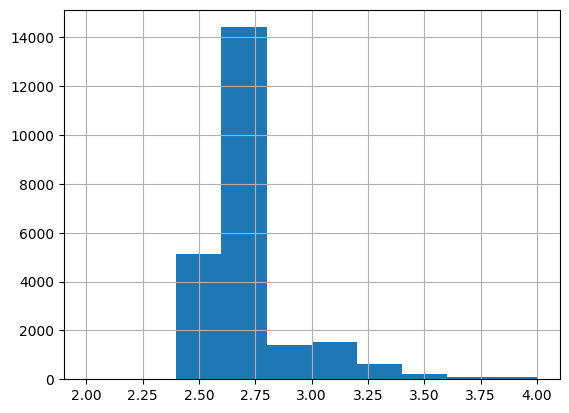

In [15]:
#устранение аномалий

#скорректируем высоту потолков у ошибочно заданных
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10

#оставим "нормальные потолки"
data = data[(data['ceiling_height'] >= 2) & (data['ceiling_height'] <= 4)]

#посмотрим на получившееся распределение
data['ceiling_height'].hist()
plt.show()

#скорректируем цену подозрительно дешевой квартире
data['last_price'][8793] = 12190000

#пусть цена будет в млн. руб
data['last_price'] = data['last_price'] / 1000000

#заменим значения в квартирах с 0 комнатами
#display(data.query('rooms == 0').sort_values(by='total_area').tail(10))
data.loc[(data['rooms'] == 0) & (data['total_area'] < 100), 'rooms'] = \
data.loc[(data['rooms'] == 0) & (data['total_area'] < 100), 'rooms'] = 1
data.drop(labels = [19392], axis=0, inplace = True)

#раскомментировать при необходимости
#display(data.sort_values(by='last_price').tail(10))
#display(data.sort_values(by='total_area').tail(10))
#display(data.sort_values(by='rooms').tail(10))
#display(data.query('rooms == 0').sort_values(by='total_area').tail(10))

В высоте потолков были выбросы. Скорее всего, там где указано 25 м - это высота 2.5 м, природа этих аномалий ясна, ошибка пользователя при указании значений, поэтому для этих значений можно выполнить деление на 10.  
Но даже высота потолков в 4 м уже выглядит странно, а мы имеем дело с квартирами, не с частными домами, тут застройка, как правило типовая. Таких значений немного, всего 53 и думаю, лучшим решением будет избавиться от сверхвысоких потолков.  
От сверхнизких потолков тоже лучше избавиться, всего 3 значения с высотой менее 2 м.  
Была обнаружена квартира с ценой 12190 за 2-х комн. кв. с площадью 109 квадр метров. Предполагаю, что такой ценник был выставлен нарочно, можно сказать "кликбейт", люди гораздо чаще обратят внимание на это и если ставить фильтр цен, то такая квартира будет первой в выдаче по дешевости. Продавцу удался этот трюк и квартира была продана за 8 дней. А в реальности на ценнике на 3 нуля должно быть больше, т.е. равна 12190000. Однако, для дальнейшего удобства, пусть цены квартир будут отображаться в млн. руб., поэтому поделим значения на 1 млн.  
Было обнаружено, что в 196 квартирах было указано 0 комнат, в большинстве своем их площадь не превышает 50 кв. м., а у 3-х значений более 50 кв. м. указано, что они являются студиями, поэтому логично будет поставить им значение 1 комнаты. Остается одна квартира с общей площадью 371 кв. м., т.к. комнат там может быть сколько угодно, полагаю, что лучшим решением будет удалить данное значение.  
Изначально, на гистограммах показались подозрительными выбросами в total_area, rooms. При более детальном изучении, можно сообщить следующее, что самые дорогие квартиры имеют большое кол-во комнат и соотвественно большую площадь. Скорее всего, это квартиры в доходных домах в историческом центре Санкт-Петербурга или инвестиционная недвижимость. 

### Подсчет и добавление в таблицу новых столбцов

In [16]:
#цена за 1 квадратный метр в тыс. руб.
data['price_square_meter'] = data['last_price'] / data['total_area'] * 1000

#день недели, месяц, год публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

#тип этажа квартиры
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

#расстояние до центра города в километрах
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).astype("Int64")

#проверка
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_perfect,price_square_meter,weekday,month,year,floor_type,city_centers_nearest_km
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,Санкт-Петербург,120.370370,3,3,2019,другой,16
1,7,3.350,40.4,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817,18603,0,<NA>,0,<NA>,81.0,Шушары,82.920792,1,12,2018,первый,18
2,10,5.196,56.0,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,Санкт-Петербург,92.785714,3,8,2015,другой,13
3,0,64.900,159.0,2015-07-24,3,2.65,14,89.83,9,False,False,False,29.78,0,Санкт-Петербург,28098,6800,2,84,3,234,424.0,Санкт-Петербург,408.176101,4,7,2015,другой,6
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0,Санкт-Петербург,100.000000,1,6,2018,другой,8


Цену за 1 кв. метр была рассчитана делением цены на общую площадь в квадр. метрах. Стоимость квартиры удобнее видеть в млн. руб ., однако цену за 1 кв. метр обычно отображают в тыс. руб.  
Добавили новые столбцы с днем недели, месяцем и годом публикации объявления.  
При определении типа этажа возникает вопрос, что делать с квартирами в одноэтажных домах. Они подходят под условие и первого, и  последнего этажа. Но лучше поставить первый этаж, т.к. думаю под последним этажом подразумевается квартира на более высоком этаже.  
Также у нас есть столбец с расстоянием до центра города в км.  

### Проведите исследовательский анализ данных

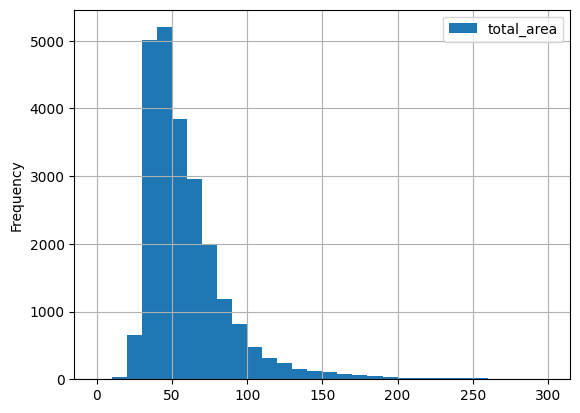

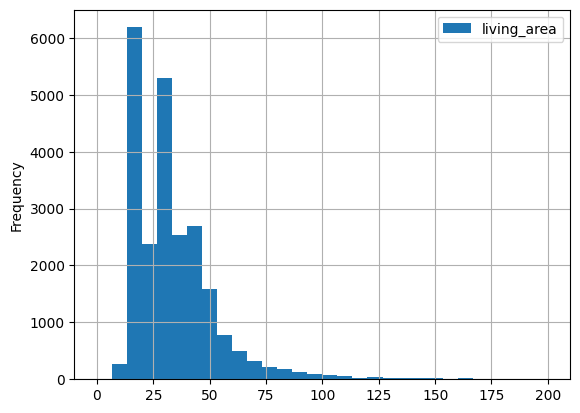

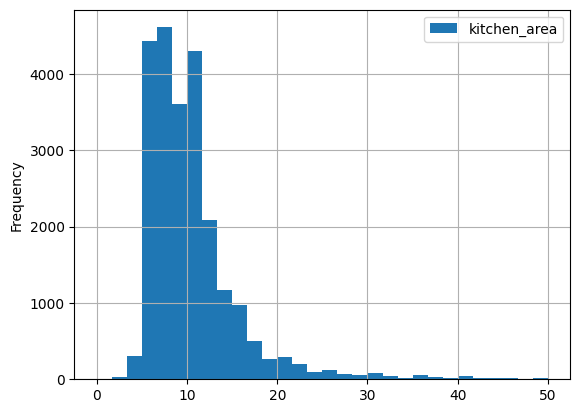

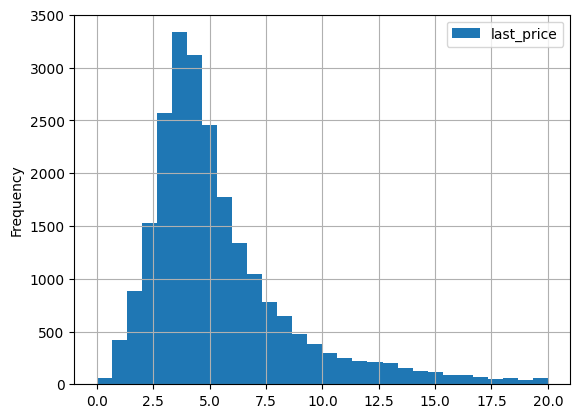

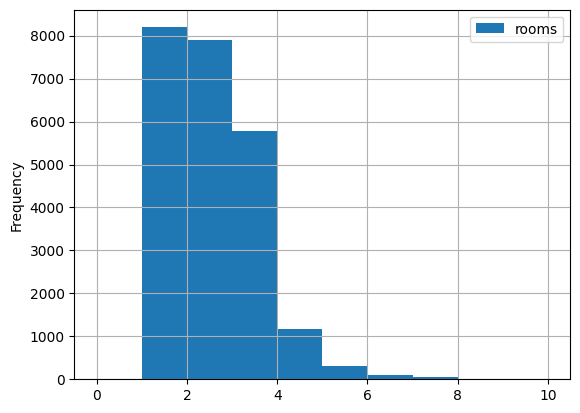

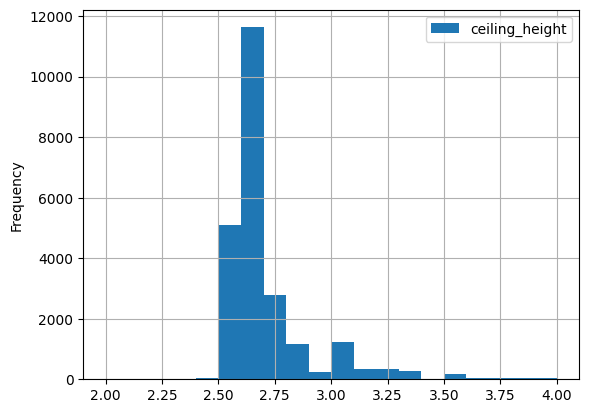

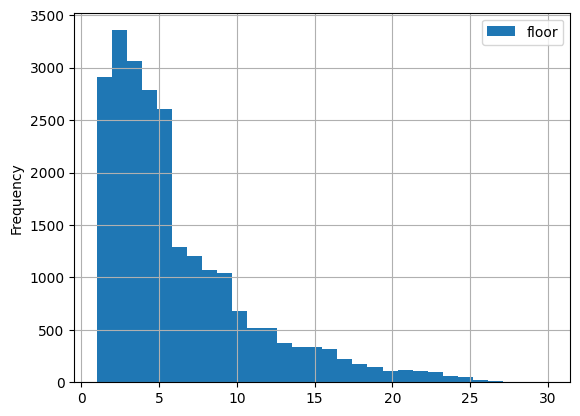

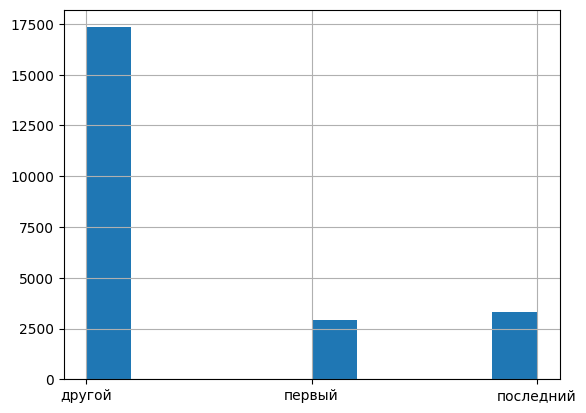

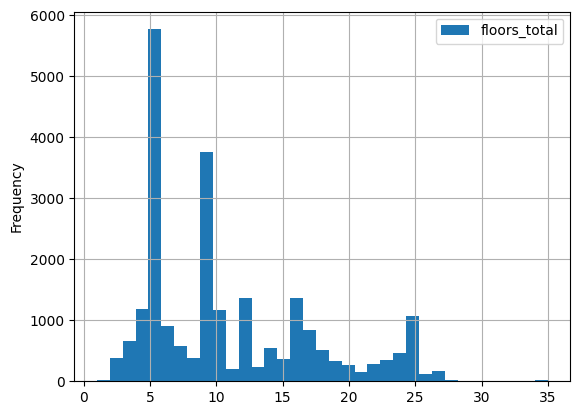

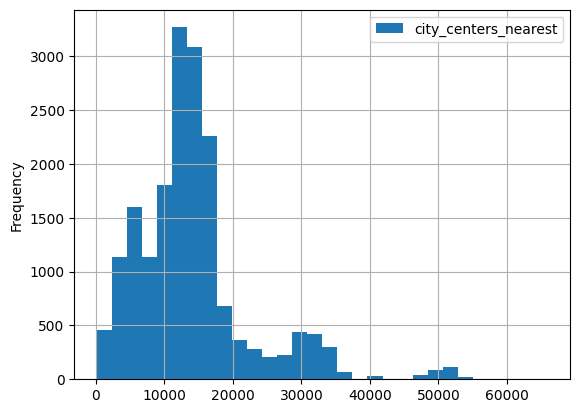

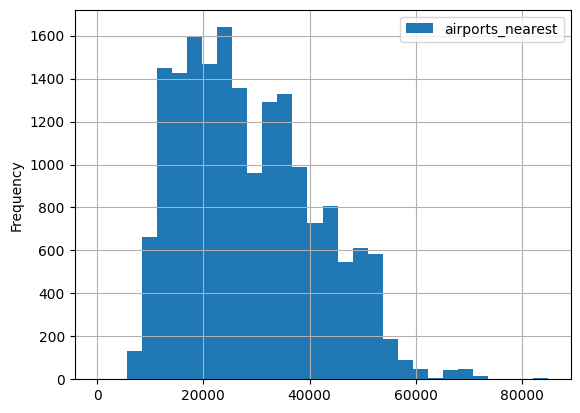

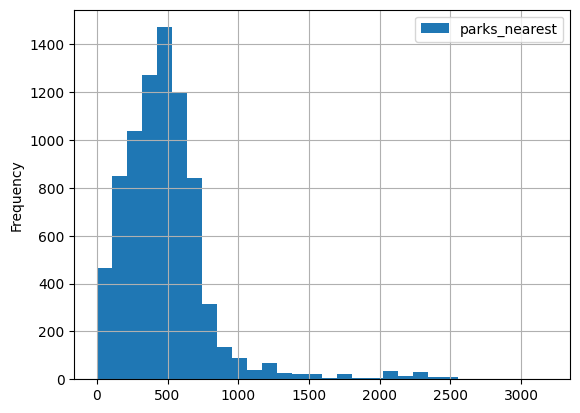

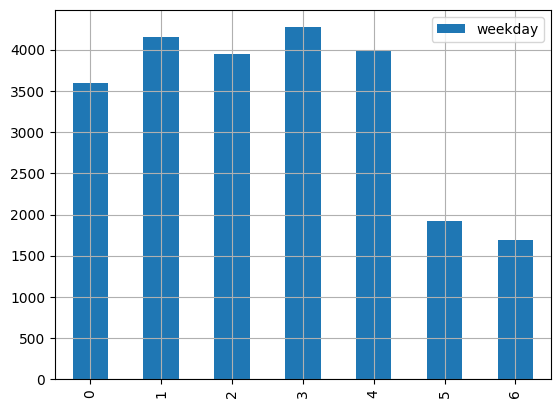

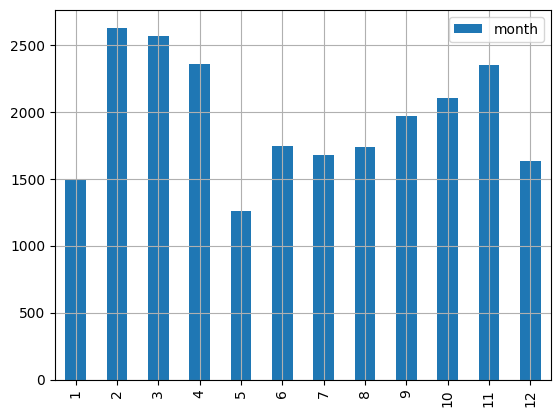

In [17]:
#общая площадь
data['total_area'].plot(kind='hist', bins=30, range=(0, 300), grid=True, legend=True)
plt.show()

#жилая площадь
data['living_area'].plot(kind='hist', bins=30, range=(0, 200), grid=True, legend=True)
plt.show()

#площадь кухни
data['kitchen_area'].plot(kind='hist', bins=30, range=(0, 50), grid=True, legend=True)
plt.show()

#цена
data['last_price'].plot(kind='hist', bins=30, range=(0, 20), grid=True, legend=True)
plt.show()
#data.query('20000000 < last_price').count()

#кол-во комнат
data['rooms'].plot(kind='hist', bins=10, range=(0, 10), grid=True, legend=True)
plt.show()

#высота потолков
data['ceiling_height'].plot(kind='hist', bins=20, range=(2, 4), grid=True, legend=True)
plt.show()

#этаж
data['floor'].plot(kind='hist', bins=30, range=(1, 30), grid=True, legend=True)
plt.show()

#тип этажа
data['floor_type'].hist()
plt.show()

#общее количество этажей в доме;
data['floors_total'].plot(kind='hist', bins=35, range=(1, 35), grid=True, legend=True)
plt.show()

#расстояние до центра города в метрах
data['city_centers_nearest'].plot(kind='hist', bins=30, grid=True, legend=True)
plt.show()

#расстояние до до ближайшего аэропорта
data['airports_nearest'].plot(kind='hist', bins=30, grid=True, legend=True)
plt.show()

#расстояние до до ближайшего парка
data['parks_nearest'].plot(kind='hist', bins=30, grid=True, legend=True)
plt.show()

#день публикации объявления
data['weekday'].value_counts().sort_index().plot(kind='bar', grid=True, legend=True)
plt.show()

#месяц публикации объявления
data['month'].value_counts().sort_index().plot(kind='bar', grid=True, legend=True)
plt.show()

По общей площади можно сделать вывод, что основная масса квартир имеет квадратуру от 30 до 50 м. На гистограмме мы наблюдаем распределение Пуассона.  
В жилой площади мы наблюдаем 2 скачка на графике, первый около 15 кв. м., другой около 30 кв. м. Думаю, это можно связать с жилой площадью в 1-к и 2-к квартирах.  
Кухни по гистограмме обычно имеют площадь 5-12 кв. м.  
В целом, большинство цен на недвижимость колеблется в основном от 3 до 5 млн. руб.  
*Однако все эти наблюдения выше объединяет то, что у них имеется длинный хвост (пуассон. распред.), можно это легко объяснить тем, что в выборке есть элитные квартиры с большой площадью и соответственно высокой ценой, что и создает хвост на графике.*  
По потолкам все достаточно очевидно, 2.6м стандартная высота потолков, плюс-минус 15 см. охватывают большинство выборки.  
Основная масса квартир находятся с 1-го по 5-й этаж.  
Достаточно очевидно, что большинство квартир находятся ни на первом, ни на последнем этаже. Но последних этажей чуть больше, чем на первом.  
Преобладают пятиэтажки, далее идут девятиэтажки. Жаль, что нет в данных типа дома, скорее всего это были бы "панельки".  
По графикам пиковые значения расстояния до центра города 11 - 15 км. А до аэропорта 12 - 25 км, . Но не забываем, что часть данных отсутствовала.  
Выяснено, что в пределах 800 м. у основной массы квартир находится парк. Этому можно порадоваться, но у нас не было 2/3 исходных данных. Возможно у этих квартир как раз и нет парка поблизости, и тогда наш график выглядел бы совсем по другому.  
В практически любой будний день объявления публикуются в 2 раза чаще, чем в любой из выходных дней. Наверное, можно объяснить это тем, что большинство объявлений публикуются риелторами, а они в свою очередь работают по будням.  
С месяцами наблюдения еще интереснее. Январь, очевидно проседает из-за новогодних праздников, а с февраля по апрель идет пик публикаций. Однако, в мае, значение по графику самое низкое, есть праздники в начале месяца, но кол-во выходных дней явно меньше, чем в январе. Тенденция не совсем понятна, но факт есть факт. Далее, с наступлением лета и до конца осени идет плавный рост новых публикаций. Декабрь опять проседает почти до январских значений, я бы назвал декабрь "полумесяцем". Первую половину все как обычно, а во второй половине уже идет подготовка к Новому Году, покупка подарков и пр. В общем, не до продаж квартир.

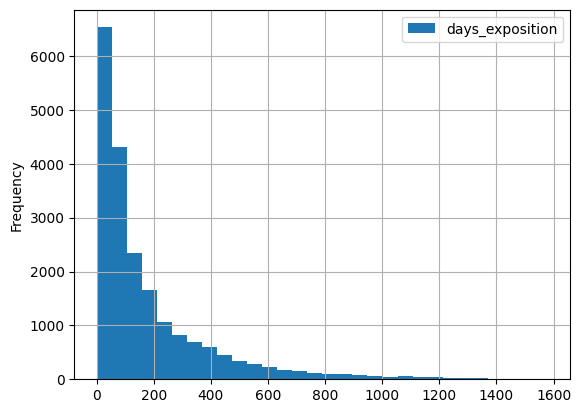

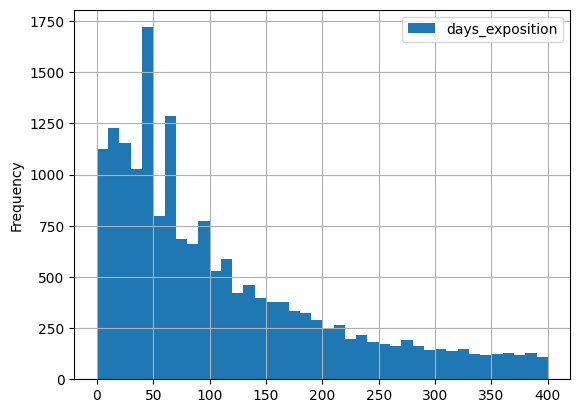

count    20392.000000
mean       180.610632
std        219.386468
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Средний арифметический срок продажи квартиры: 180
Медианнный срок продажи квартиры: 95


In [18]:
#как быстро продавались квартиры
#гистограмма
data['days_exposition'].plot(kind='hist', bins=30, grid=True, legend=True)
plt.show()

#взглянем поближе на гистограмму
data['days_exposition'].plot(kind='hist', bins=40, range=(0, 400), grid=True, legend=True)
plt.show()

display(data['days_exposition'].describe())

print('Средний арифметический срок продажи квартиры:', int(data['days_exposition'].mean()))
print('Медианнный срок продажи квартиры:', int(data['days_exposition'].median()))

#data.query('days_exposition <= 3').count()
#data.query('days_exposition > 365').count()

Распределение срока продаж квартир характеризуется длинным хвостом. Медиана равная 95 дням почти в 2 раза меньше среднего арифметического 180 дней. Возможно, чтобы характеризовать быстрые и долгие продажи, стоит ориентироваться на показатели первого и третьего квартилей. Продажа менее, чем за 45 дней - можно назвать быстрой, а долгой - более 231 дня (почти 8 месяцев).  
Здравый смысл подсказывает, что квартира день в день не продается, но мы смотрим на показатель снятия объявления, так что вполне возможно, что покупателю все понравилось, он внес залог и объявление сняли, а далее уже оформление документов, тем более продаж в течении 3 дней не так уж и много, всего 4. Другое дело с объявлениями, "висящие" более года, таких не мало, более 3000 публикаций, можно было бы трактовать это слишком высоким ценником или неудобным расположением, например, недвижимость в деревне. Иначе, как аномалией, это тяжело назвать.

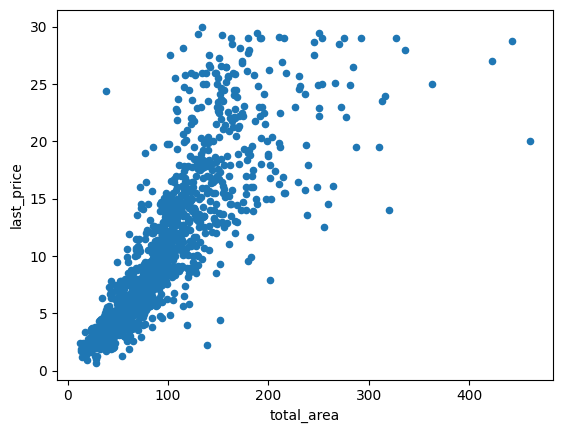

Корреляция с общей площадью: 0.65


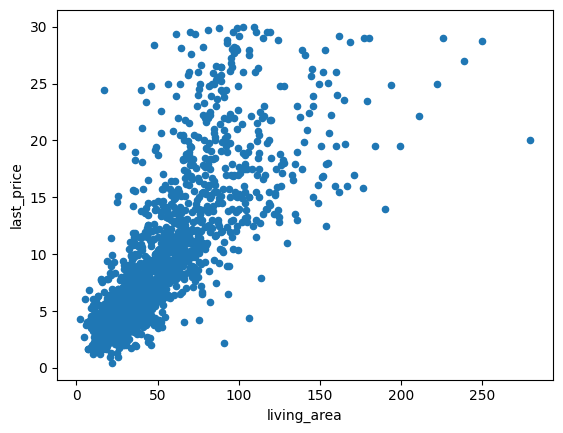

Корреляция с жилой площадью: 0.58


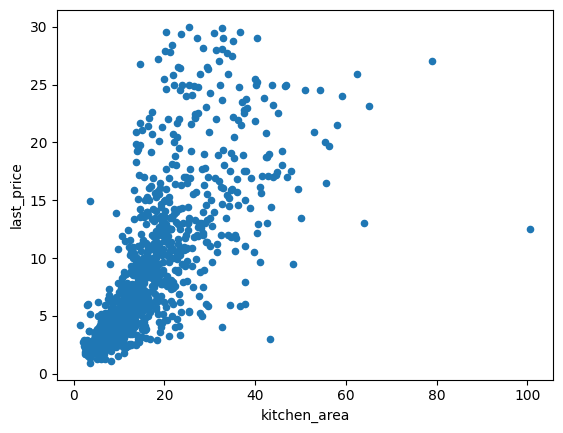

Корреляция с площадью кухни: 0.51


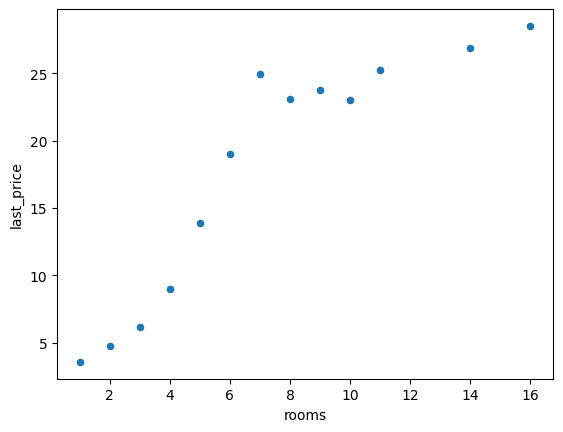

Корреляция с кол-вом комнат: 0.36
Корреляция с кол-вом комнат до 7: 0.35


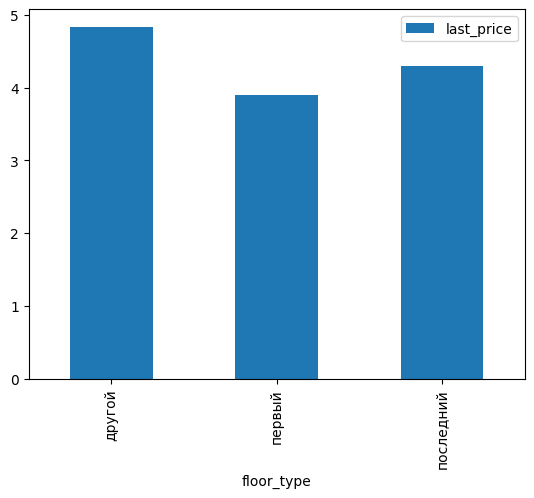

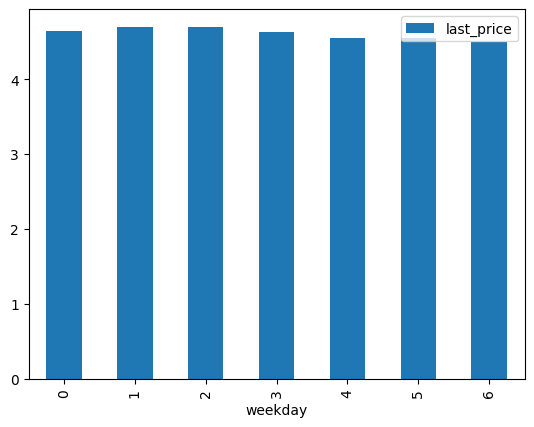

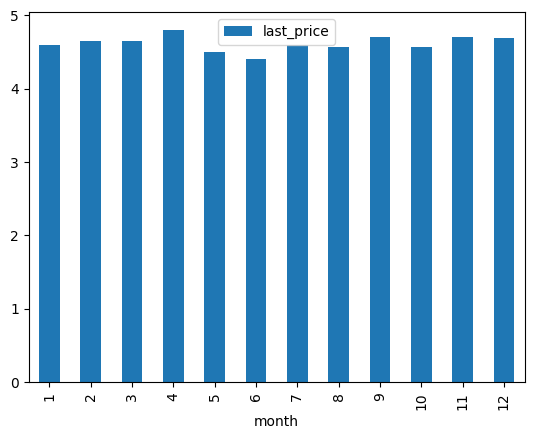

   year  last_price
0  2014        7.64
1  2015        5.30
2  2016        4.50
3  2017        4.50
4  2018        4.55
5  2019        5.05


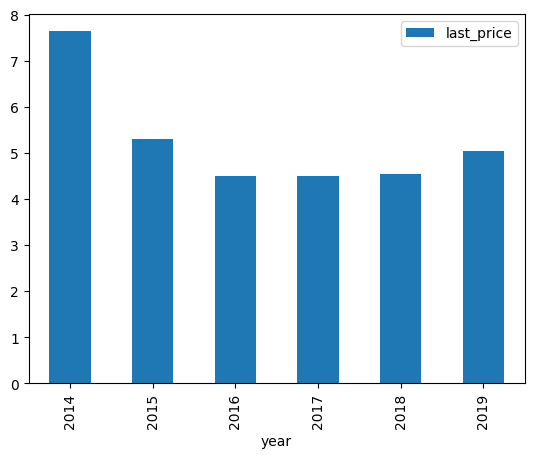

In [19]:
#Какие факторы больше всего влияют на общую стоимость

#общая площадь
(data.pivot_table(index='total_area', values='last_price', aggfunc='median').reset_index()
.query('last_price < 30').plot(x='total_area', y='last_price', kind='scatter'))
plt.show()
print('Корреляция с общей площадью:', round(data['last_price'].corr(data['total_area']), 2))

#жилая площадь
(data.pivot_table(index='living_area', values='last_price', aggfunc='median').reset_index()
.query('last_price < 30').plot(x='living_area', y='last_price', kind='scatter'))
plt.show()
print('Корреляция с жилой площадью:', round(data['last_price'].corr(data['living_area']), 2))

#площадь кухни
(data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').reset_index()
.query('last_price < 30').plot(x='kitchen_area', y='last_price', kind='scatter'))
plt.show()
print('Корреляция с площадью кухни:', round(data['last_price'].corr(data['kitchen_area']), 2))
 
#кол-во комнат
(data.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index()
.query('last_price < 30').plot(x='rooms', y='last_price', kind='scatter'))
plt.show()
print('Корреляция с кол-вом комнат:', round(data['last_price'].corr(data['rooms']), 2))

data_seven_rooms = data.query('rooms <= 7')
print('Корреляция с кол-вом комнат до 7:', round(data_seven_rooms['last_price'].corr(data_seven_rooms['rooms']), 2))

#тип этажа
(data.pivot_table(index='floor_type', values='last_price', aggfunc='median').reset_index()
.plot(x='floor_type', y='last_price', kind='bar'))
plt.show()

#день недели размещения
(data.pivot_table(index='weekday', values='last_price', aggfunc='median').reset_index()
.plot(x='weekday', y='last_price', kind='bar'))
plt.show()

#месяц размещения
(data.pivot_table(index='month', values='last_price', aggfunc='median').reset_index()
.plot(x='month', y='last_price', kind='bar'))
plt.show()

#год размещения
print(data.pivot_table(index='year', values='last_price', aggfunc='median').reset_index())
(data.pivot_table(index='year', values='last_price', aggfunc='median').reset_index()
.plot(x='year', y='last_price', kind='bar'))
plt.show()

Мы проверили как влияют различные на факторы на цену квартиры.  
Безусловно, площадь квартиры положительно коррелирует с ценой, но нельзя назвать зависимость сильной. Показатель корреляции в 0.65 средний, это верно, так как есть другие немаловажные факторы, влияющие на цену, это расположение, тип дома, текущий ремонт в квартире. Жилая площадь и площадь кухни также положительно средне влияют на цену, показатели корреляции немного меньше, чем общая площадь. На графиках мы также можем в этом убедится, увидев положительный рост.  
Корреляция показывает, что связь с кол-вом комнат слабая, взглянув на график, было предположено, что положительная тенденция замечена до значения в 7 комнат (экспоненциальный рост), а далее кол-во комнат уже не так важно, медианная цена этих квартир падает, потом снова вырастает. Однако, как показала корреляция с выборкой, где комнат 7 и меньше, разницы никакой, корреляция слабая.  
Получается, что в среднем квартиры ни на первом, ни на последнем этажах дороже. Почти 5 млн. стоят такие квартиры, первые этажи около 4 млн, а на последнем этаже в среднем 4.2 млн руб.  
Неважно, в какой день публиковать объявление, на среднюю цену квартиры это не повлияет. Месяц практически тоже не влияет, но в апреле все-таки повыше в среднем цены, а в мае-июне ниже.  
С годом все обстоит по-другому. Квартиры, опубликованные в 2014 году, имели полную стоимость на момент продажи примерно на 3 млн. руб. выше, чем в другие года. Казалось бы, что с годами цены наоборот вырастают. Возможно, после кризиса в 2014 владельцы дорогих квартир стали массово их продавать.

In [20]:
#средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

#data['locality_name_perfect'].value_counts().head(10)
top_ten_locality_name = data['locality_name_perfect'].value_counts().head(10)

for i in top_ten_locality_name.index.to_list():
    print(i)
    #print(data.loc[data['locality_name_perfect'] == i, ['price_square_meter']].mean())
    last_price_sum = data.loc[data['locality_name_perfect'] == i, ['last_price']].sum()
    total_area_sum = data.loc[data['locality_name_perfect'] == i, ['total_area']].sum()
    print('Средняя цена за кв. метр в тыс. руб.:', round(last_price_sum[0] * 1000 / total_area_sum[0], 3))

Санкт-Петербург
Средняя цена за кв. метр в тыс. руб.: 123.932
Мурино
Средняя цена за кв. метр в тыс. руб.: 83.383
Кудрово
Средняя цена за кв. метр в тыс. руб.: 93.873
Шушары
Средняя цена за кв. метр в тыс. руб.: 76.267
Всеволожск
Средняя цена за кв. метр в тыс. руб.: 67.603
Пушкин
Средняя цена за кв. метр в тыс. руб.: 105.016
Колпино
Средняя цена за кв. метр в тыс. руб.: 74.468
Парголово
Средняя цена за кв. метр в тыс. руб.: 87.111
Гатчина
Средняя цена за кв. метр в тыс. руб.: 68.475
Выборг
Средняя цена за кв. метр в тыс. руб.: 57.815


Была рассчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.  
Для начала мы нашли эти 10 населенных пунктов. Хоть у нас в таблице и присутствует цена за 1 квадратный метр, было бы некорректно посчитать среднее от этих значений. Поэтому сложим все стоимости квартир и поделим на сумму всех площадей в населенном пункте, это и будет средняя цена квадр. метра в выбранном пункте. Например, для Санкт-Петербурга разница в способах составила почти 10 тыс. руб. за кв. метр.  
Самая низкая стоимость в Выборге - менее 58 тыс. руб. за кв. метр, самая высокая у Санкт-Петербурга - почти 124 тыс. руб.

<AxesSubplot:xlabel='city_centers_nearest_km'>

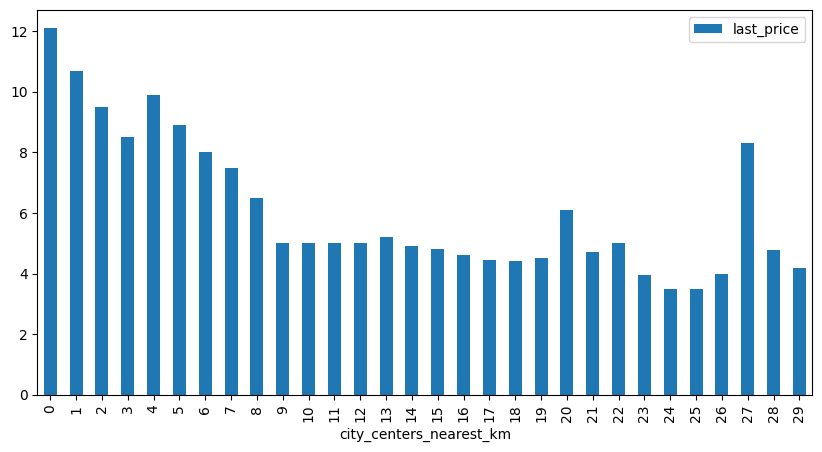

In [21]:
#средняя цена каждого километра в Санкт-Петербурге

(data.query('locality_name_perfect == "Санкт-Петербург"').groupby('city_centers_nearest_km')['last_price'].median()
.plot(kind='bar', figsize=(10, 5), legend=True)
)

#data.query('locality_name_perfect == "Санкт-Петербург" & city_centers_nearest_km == 27')

Была построена столбчатая диаграмма для средней цены каждого км. Цена определялась медианой, дабы избежать отклонения из-за дорогих квартир уровня премиум.  
Чем ближе к центру города, тем выше средняя цена квартир. Однако, ниспадающая тенденция продолжается вплоть до расст. в 9 км от центра Санкт-Петербурга. Далее цена зафиксировалась на уровне около 4-5 млн. руб, но на расст. 20 км. цена вырастает до 6 млн., а на расст. 27 км. средняя стоимость выше 8 млн. руб. Предполагаю, что в первом случае цена могла вырасти из-за дорогого жилого комплекса, т.к. выборка состояла из более 80 наблюдений. Во втором случае рассматривалось всего 2 квартиры, одна из них была стоимостью более 14 млн. руб., что и повлияло на резкий скачок на графике. 

### Общий вывод

  Наше исследование изучает данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Перед нами была поставлена задача найти интересные особенности и зависимости, которые существуют на рынке недвижимости. В дальнейшем это позволит построить автоматизированную систему определения рыночной стоимости объектов недвижимости.  
  
Для этого мы выделили 5 пунктов для анализа:  
  - Изучение параметров объекта недвижимости
  - Изучение сроков продаж квартир
  - Факторы, влияющие на общую стоимость объекта
  - Расчет средней цены одного квадратного метра
  - Зависимость средней цены от удаленности от центра в г. Санкт-Петербург  
  
**Изучение параметров объекта недвижимости**  
  
Нами были изучены и описаны следующие параметры, а также построены гистограммы для каждого из них:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления  
  
В результате, мы выяснили, что:  
  1. Для первых 5 параметров характерно распределение Пуассона, ярко выраженный пик значений и длинный хвост.
  2. Большинство квартир имеет общую площадь от 30 до 50 кв. м., жилую площадь от 15 до 30 кв. м. и кухню от 5 до 12 кв. м.
  3. Цена большинства объектов от 3 до 5 млн. руб.
  4. Преобладают однокомнатные и двухкомнатные квартиры.
  5. Стандартная высота потолков 2.6 м.
  6. Сильно преобладают пятиэтажные дома, а следом девятиэтажные. Большинство квартир распределено с 1-го по 5-й этаж.
  7. Пиковые значения расстояния до центра города 11-15 км., до аэропорта 12-25 км.
  8. Почти у всех ближайший парк находится в пределах 800м.
  9. В будний день публикуются объявлений в 2 раза больше, чем в выходной.
  10. Чаще всего объявления публикуются с февраля по апрель и в ноябре. Реже всего в январе, мае и декабре.  
  
*Рекомендация: слишком много значений, связанных с расстоянием было пропущено, необходимо уточнить картографические данные и повторно провести исследование.*  

**Изучение сроков продаж квартир**  
  
На основании проведенного визуального анализа и численного описания данных, можем отметить, что:
  1. Распределение срока продаж квартир характеризуется распределением Пуассона.
  2. Среднее арифметическое - 180 дней, медиана - 95 дней.
  3. Быстрая продажа длится менее 45 дней. Самая быстрая продажа была осуществлена за 1 день.
  4. Долгая продажа длится больше 231 дня (7.5 месяцев). Самая долгая продажа длилась 1580 дней (4 года и 4 месяца).  
  
*Рекомендация: необходимо уточнить данные по сроку продаж, около 13% было пропущено и повторно провести исследование.*  
  
**Факторы, влияющие на общую стоимость объекта**  
  
Были построены графики зависимости цены объекта от следующих факторов:    
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);  
  
После визуализации и расчета корреляции, мы пришли к выводам, что:
  1. Влияние параметров площадей на ценообразование является значительным, но не единственным существенным. Значение корреляции стоимости с общей площадью равно 0.65, немного меньше у жилой площади(0.58) и площади кухни(0.51)  
  2. Корреляция с кол-вом комнат положительная, но слабая - 0.36.
  3. Квартиры на первом этаже самые дешевые, их средняя стоимость 3.9 млн руб., квартиры на последнем этаже в среднем стоят 4.3 млн. руб., остальные около 4.8 млн. руб.
  4. День недели и месяц публикации объявления практически не влияют на стоимость недвижимости.
  5. Объекты, выставленные на продажу в 2014 году были самыми дорогими, их средняя цена составила 7.6 млн. руб. В 2015 г. средняя цена была 5.3 млн. руб., с 2016 по 2018 около 4.5 млн. руб, а в 2019 г. чуть выше 5 млн. руб.  
  
*Рекомендация: для исследования зависимости цены объекта можно использовать также параметры локации, например по району или по улице, а также по типу дома или году постройки.*  

**Расчет средней цены одного квадратного метра**  

Для расчета средней цены одного квадратного метра были определены 10 населенных пунктов с наибольшим числом объявлений. После этого были получены такие данные:  

| Населенный пункт | Средняя цена кв. метра (т.р.)|
|:--- | :--- |
| Санкт-Петербург | 123.913 
| Мурино | 83.414
| Кудрово | 93.947
| Шушары | 76.328
| Всеволожск | 67.603
| Пушкин | 105.016
| Колпино | 74.468
| Парголово | 87.111
| Гатчина | 68.475
| Выборг | 57.815
  
Вышеуказанное позволило нам установить, что самая высокая стоимость квадратного метра в г. Санкт-Петербург, а самая низкая в г. Выборг.  

**Зависимость средней цены от удаленности от центра в г. Санкт-Петербург**
  
Найденные и проанализированные нами данные позволяют выделить следующую закономерность: в пределах 9 км. от центра города чем дальше находится объект, тем ниже его цена.  
   
Недвижимость, находящаяся непосредственно в центре имеет среднюю стоимость в 12 млн. руб., у квартир, находящихся за пределами радиуса 9 км, средняя цена колеблется от 4 до 5 млн. руб., за исключением некоторых значений, по которым, возможно, не хватило данных.  

*Рекомендация: увеличить выборку по недвижимости, удаленных от центра более, чем на 20 км. и повторно провести исследование.*

**Итоги и общие рекомендации**  
  
В заключение можно сказать, что рынок недвижимости - комплексная многогранная сфера. Для дальнейшей работы и закрепления полученных результатов рекомендуется повысить качество выборки, в частности, картографические данные, увеличить кол-во параметров, влияющих на стоимость объектов, а также дополнить данными за 2020 год и после.